## Import Packages

Package called PIL is used for image processing. Other packages are needed to run Qiskit Metal

In [1]:
from PIL import Image
import numpy as np

from qiskit_metal import draw, Dict
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent
import qiskit_metal as metal

In [2]:
design = metal.designs.DesignPlanar()

In [3]:
dir(QComponent)

['TOOLTIP',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__i_am_component__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_to_design',
 '_check_pin_inputs',
 '_delete_evaluation',
 '_gather_all_children_metadata',
 '_gather_all_children_options',
 '_get_specific_table_values_from_renderers',
 '_get_table_values_from_renderers',
 '_get_unique_class_name',
 '_is_name_used',
 '_register_class_with_design',
 'add_dependency',
 'add_pin',
 'add_qgeometry',
 'class_name',
 'component_metadata',
 'connect_components_already_in_design',
 'default_options',
 'delete',
 'design',
 'get_pin',
 'get_template_options',
 'id',
 'logger',
 'make',
 'name',
 'options',
 'parse_options',
 'parse_value',
 'pin_names',
 

## Create your own component here 

In this section We create our component. 
User must paste link to the image in this section. Next set up etch rectangle and assign pins. 
All the user inputs are commented. Please follow instructions what to add in commented sections in code: """User input here"""

In [1]:
class MyQComponent(QComponent):
    """
    Use this class as a template for your components - have fun

    Description:

    Options:
    """

    # Edit these to define your own tempate options for creation
    # Default drawing options
    default_options = Dict(width='500um',
                           height='300um',
                           pos_x='0um',
                           pos_y='0um',
                           orientation='0',
                           layer='1')
    """Default drawing options"""

    # Name prefix of component, if user doesn't provide name
    component_metadata = Dict(short_name='component',
                             _qgeometry_table_poly='True')
    """Component metadata"""
    
    def make(self):
        """Convert self.options into QGeometry."""
        p = self.parse_options()  # Parse the string options into numbers
          
        
        
        
        
        """User input here"""
        """ADD IMAGE HERE - path to your image"""
        #EXAMPLE MADE BY SIMON MAREK :)
        with Image.open("test31.jpg") as im:   #HERE copy name of image Assuming you have image file in same folder as this py file
            
            """USER DEFINED STUFF HERE"""
            #offsetx = 0 #Image movement
            #offsety = 0 #Image movement
            scale = 0.0625 #Scale of Image TO GET GOOD RESULTS SCALE ONLY IN this order (0.5; 0.25; 0.125; ...)
            mode = True #modes True/False == ETCHING STYLES
            
            
            
            """Do not touch"""
            """Some Image processing """
            im=im.convert("1")
            im = im.transpose(Image.ROTATE_270)
            numpydata = np.asarray(im)
            
            """For debugging """
            print(im.height)
            print(im.width)
            #im.show() #For debugging image = correct colours-black&white (should be rotated)
            #print (numpydata) #For debugging binary array
            #print (numpydata[1][2]) #For debugging binary array
            
            fwidth=(im.width)-1
            fheight=(im.height)
    
            """Image drawing """
            face = draw.rectangle((im.height-1)*scale,(im.width-1)*scale,((im.height-1)/2)*scale,((im.width-1)/2)*scale)
            for x in range(fheight):
                    for y in range(fwidth):
                        if mode == (numpydata[x][y]):
                            #face1 = draw.rectangle(1*scale,1*scale,(x*scale)+"""offsetx"""+(0.5*scale),(y*scale)+"""offsety"""+(0.5*scale))
                            face1 = draw.rectangle(1*scale,1*scale,(x*scale)+(0.5*scale),(y*scale)+(0.5*scale))
                            face = draw.subtract(face, face1)
                            
            face
        geom = {'my_polygon': face}
        self.add_qgeometry('poly', geom, layer=1, subtract=False)

        
        
        
        """User input here"""
        """Etch rectangle """
        #Etch rectangle
        #etch=draw.rectangle(((im.width-1)*scale),((im.height-1)*scale),(((im.width-1)/2)*scale),(((im.height-1)/2)*scale))
        etch=draw.rectangle(32.5,6,16.25,3)
        self.add_qgeometry('poly', dict(etch=etch), subtract=True)

        
        
        
        """User input here"""
        #Assign pins manually (if you are not sure how this works check out metal docs)
        #You can check if you did it correctly in Qiskit Metal GUI later on
        self.add_pin('p1', [(0, -48),  (0,72)], (im.width*scale)) #HERE YOU NEED TO ASSIGN PIN we will call p1 (depends on your design)
        self.add_pin('p2', [(130, 48),(130,-24)], (im.width*scale)) 

NameError: name 'QComponent' is not defined

## Rendering into Qiskit Metal

In [5]:
design = metal.designs.DesignPlanar()
gui = metal.MetalGUI(design)

## Assigning terminations to correct places

User must assign correct terminations to component (used for sim in Ansys) 

  im = im.transpose(Image.ROTATE_270)



521
96


  im = im.transpose(Image.ROTATE_270)



521
96


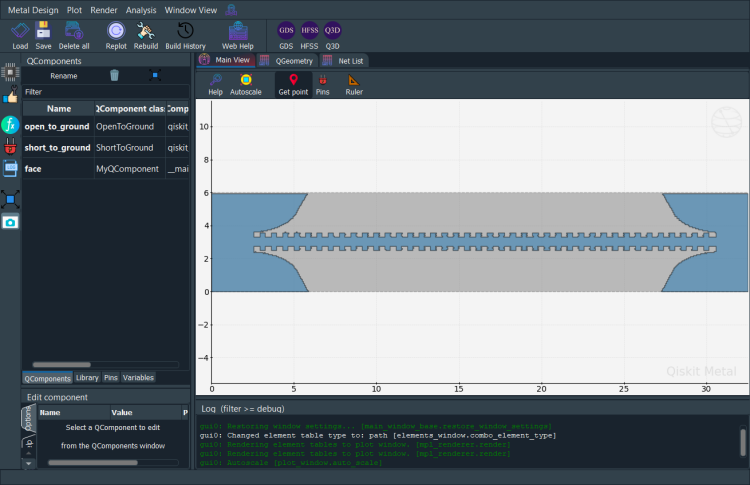

In [6]:
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround


"""User input here"""
#Assign correct location and width to the terminations manually
#You can check if you did it correctly in Qiskit Metal GUI later on
otg = OpenToGround(design, 'open_to_ground', options=dict(pos_x='32.49mm',  pos_y='3mm', orientation='0',width='6mm')) #Need to assign to correct location (width is width of your trace)
stg = ShortToGround(design, 'short_to_ground', options=dict(pos_x='0mm',  pos_y='3mm', orientation='180',width='6mm'))



face = MyQComponent(design,'face',Dict(
            pin_inputs=Dict(
            start_pin=Dict(component='short_to_ground', pin='short'),
            end_pin=Dict(component='open_to_ground', pin='open')), ))
gui.rebuild()
gui.autoscale()
gui.screenshot()

## EPR Analysis

In this section we export your created QComponent to Ansys in order to perform simulation

In [7]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_res = EPRanalysis(design, "hfss")

In [8]:
hfss = eig_res.sim.renderer

In [9]:
hfss.start()

INFO 12:13PM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:13PM [load_ansys_project]: 	Opened Ansys App
INFO 12:13PM [load_ansys_project]: 	Opened Ansys Desktop v2021.2.0
INFO 12:13PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/simon/Documents/Ansoft/
	Project:   Project12
INFO 12:13PM [connect_design]: No active design found (or error getting active design).
INFO 12:13PM [connect]: 	 Connected to project "Project12". No design detected


True

In [10]:
hfss.activate_ansys_design("Readout", 'eigenmode')

12:13PM 01s WARNING [activate_ansys_design]: The design_name=Readout was not in active project.  Designs in active project are: 
[].  A new design will be added to the project.  
INFO 12:13PM [connect_design]: 	Opened active design
	Design:    Readout [Solution type: Eigenmode]
WARNING 12:13PM [connect_setup]: 	No design setup detected.
WARNING 12:13PM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:13PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [11]:
hfss.render_design(['face'], [])
#hfss.save_screenshot()

In [12]:
setup = hfss.pinfo.setup
setup.passes = 20
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
hfss.pinfo.design.set_variable('Lj', '10 nH')
hfss.pinfo.design.set_variable('Cj', '0 fF')

setup.analyze()

INFO 12:13PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 20
Convergence freq max delta percent diff  = 0.1



In [13]:
eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = hfss.get_convergences()
eig_res.sim.plot_convergences()

12:23PM 28s INFO [get_f_convergence]: Saved convergences to C:\Users\simon\Documents\Python Scripts\hfss_eig_f_convergence.csv


In [14]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
#hfss.save_screenshot()

12:23PM 30s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()
12:23PM 33s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: QEventDispatcherWin32::wakeUp: Failed to post a message (Not enough quota is available to process this command.)

12:23PM 33s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: QEventDispatcherWin32::wakeUp: Failed to post a message (Not enough quota is available to process this command.)

